<a href="https://colab.research.google.com/github/DivyaSadhana/PV-Supervised-ML/blob/main/Supervised_Machine_Learning_for_Pharmacovigilance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Establish connection between My Drive and Google colab


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
#Import Excel sheet from My Drive

import pandas as pd

In [6]:
df = pd.read_excel(r'/content/gdrive/My Drive/Tracker.xlsx')
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ADVERSE_EVENT,Number_of_Adverse_Events
0,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,25.1,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Blood pressure orthostatic abnormalCOVID-19Com...,5
1,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,25.1,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Head injuryHeadacheLaboratory testMagnetic res...,5
2,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,NaN,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test positiveUnresponsive to stimul...,3
3,2547731,2023-01-01,MA,6.0,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,NaN,...,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Product preparation issue,1
4,2547732,2023-01-01,MA,38.0,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,NaN,...,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT)),Injury associated with device,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,2552102,2023-01-06,NaN,NaN,NaN,NaN,U,NaN,HEART RATE WENT UP TO 186; GOT COVID; This spo...,NaN,...,NaN,COVID19,JANSSEN,NaN,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),COVID-19Heart rateHeart rate increased,3
3560,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,NaN,...,25.1,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),AtelectasisCOVID-19Chest X-rayComa scaleComput...,5
3561,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,NaN,...,25.1,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),Diastolic dysfunctionEchocardiogramEjection fr...,5
3562,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,NaN,...,25.1,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),MicroembolismPolymerase chain reactionSARS-CoV...,5


In [7]:
#Fill missing/NaN values of Death data as 'No' since patients who were died had already been categorised as 'Yes' in the data source.
# Classify the data into 'Yes' and 'No' category only.

df["DIED"].fillna('No', inplace=True)
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ADVERSE_EVENT,Number_of_Adverse_Events
0,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,25.1,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Blood pressure orthostatic abnormalCOVID-19Com...,5
1,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,25.1,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Head injuryHeadacheLaboratory testMagnetic res...,5
2,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,NaN,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test positiveUnresponsive to stimul...,3
3,2547731,2023-01-01,MA,6.0,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,No,...,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Product preparation issue,1
4,2547732,2023-01-01,MA,38.0,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,No,...,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT)),Injury associated with device,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,2552102,2023-01-06,NaN,NaN,NaN,NaN,U,NaN,HEART RATE WENT UP TO 186; GOT COVID; This spo...,No,...,NaN,COVID19,JANSSEN,NaN,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),COVID-19Heart rateHeart rate increased,3
3560,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,25.1,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),AtelectasisCOVID-19Chest X-rayComa scaleComput...,5
3561,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,25.1,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),Diastolic dysfunctionEchocardiogramEjection fr...,5
3562,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,25.1,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),MicroembolismPolymerase chain reactionSARS-CoV...,5


In [8]:
#Fill missing/NaN values with 'Zero' by creating new calculated column 'Number_days_for_Event_Onset'.
# This column created based on difference in number of days between 'Vaccine Administered Date' and 'Adverse Event Onset date'.
#Ensure datatype for this new column as integer.

Number_of_Days_for_Event_Onset = df['NUMDAYS'].fillna(0).astype(int)
print(Number_of_Days_for_Event_Onset)
print(Number_of_Days_for_Event_Onset.dtypes)

0        0
1        0
2        0
3        0
4        0
        ..
3559     0
3560    94
3561    94
3562    94
3563     0
Name: NUMDAYS, Length: 3564, dtype: int64
int64


In [9]:
#Add this newly created column to the dataframe

df['Number_of_Days_for_Event_Onset'] = Number_of_Days_for_Event_Onset
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ADVERSE_EVENT,Number_of_Adverse_Events,Number_of_Days_for_Event_Onset
0,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Blood pressure orthostatic abnormalCOVID-19Com...,5,0
1,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Head injuryHeadacheLaboratory testMagnetic res...,5,0
2,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test positiveUnresponsive to stimul...,3,0
3,2547731,2023-01-01,MA,6.0,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,No,...,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Product preparation issue,1,0
4,2547732,2023-01-01,MA,38.0,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,No,...,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT)),Injury associated with device,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,2552102,2023-01-06,NaN,NaN,NaN,NaN,U,NaN,HEART RATE WENT UP TO 186; GOT COVID; This spo...,No,...,COVID19,JANSSEN,NaN,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),COVID-19Heart rateHeart rate increased,3,0
3560,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),AtelectasisCOVID-19Chest X-rayComa scaleComput...,5,94
3561,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),Diastolic dysfunctionEchocardiogramEjection fr...,5,94
3562,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),MicroembolismPolymerase chain reactionSARS-CoV...,5,94


In [10]:
#Fill missing/NaN values with 'Zero' by creating new calculated column by ensuring new column datatype as integer.

AGE = df['AGE_YRS'].fillna(0).astype(int)
print(AGE)

0       53
1       53
2       53
3        6
4       38
        ..
3559     0
3560    65
3561    65
3562    65
3563     0
Name: AGE_YRS, Length: 3564, dtype: int64


In [11]:
#Add this newly created column to the dataframe

df['AGE']= AGE
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ADVERSE_EVENT,Number_of_Adverse_Events,Number_of_Days_for_Event_Onset,AGE
0,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Blood pressure orthostatic abnormalCOVID-19Com...,5,0,53
1,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Head injuryHeadacheLaboratory testMagnetic res...,5,0,53
2,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test positiveUnresponsive to stimul...,3,0,53
3,2547731,2023-01-01,MA,6.0,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,No,...,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Product preparation issue,1,0,6
4,2547732,2023-01-01,MA,38.0,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,No,...,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT)),Injury associated with device,1,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,2552102,2023-01-06,NaN,NaN,NaN,NaN,U,NaN,HEART RATE WENT UP TO 186; GOT COVID; This spo...,No,...,JANSSEN,NaN,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),COVID-19Heart rateHeart rate increased,3,0,0
3560,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),AtelectasisCOVID-19Chest X-rayComa scaleComput...,5,94,65
3561,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),Diastolic dysfunctionEchocardiogramEjection fr...,5,94,65
3562,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),MicroembolismPolymerase chain reactionSARS-CoV...,5,94,65


In [12]:
#Fill missing/NaN values with 'Zero' by creating new calculated column
#Ensure datatype for this new column as integer

Vaccine_Dose = df['VAX_DOSE_SERIES'].fillna(0).astype(int)
Vaccine_Dose

0       0
1       0
2       0
3       3
4       4
       ..
3559    1
3560    2
3561    2
3562    2
3563    2
Name: VAX_DOSE_SERIES, Length: 3564, dtype: int64

In [13]:
#Add this newly created column to the dataframe

df['Vaccine_Dose'] = Vaccine_Dose
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ADVERSE_EVENT,Number_of_Adverse_Events,Number_of_Days_for_Event_Onset,AGE,Vaccine_Dose
0,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Blood pressure orthostatic abnormalCOVID-19Com...,5,0,53,0
1,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Head injuryHeadacheLaboratory testMagnetic res...,5,0,53,0
2,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test positiveUnresponsive to stimul...,3,0,53,0
3,2547731,2023-01-01,MA,6.0,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,No,...,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Product preparation issue,1,0,6,3
4,2547732,2023-01-01,MA,38.0,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,No,...,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT)),Injury associated with device,1,0,38,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,2552102,2023-01-06,NaN,NaN,NaN,NaN,U,NaN,HEART RATE WENT UP TO 186; GOT COVID; This spo...,No,...,NaN,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),COVID-19Heart rateHeart rate increased,3,0,0,1
3560,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),AtelectasisCOVID-19Chest X-rayComa scaleComput...,5,94,65,2
3561,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),Diastolic dysfunctionEchocardiogramEjection fr...,5,94,65,2
3562,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),MicroembolismPolymerase chain reactionSARS-CoV...,5,94,65,2


In [15]:
#Now create new dataframe by including columns (7 out of 59) which are actually needed for machine learning by excluding rest of the columns
#The ignored/removed columns (52 out of 59) are unwanted for final assessment

Required_Data = df[['AGE','SEX','DIED','VAX_NAME','VAX_MANU','Vaccine_Dose','Number_of_Days_for_Event_Onset']]
Required_Data.head(5)

,AGE,SEX,DIED,VAX_NAME,VAX_MANU,Vaccine_Dose,Number_of_Days_for_Event_Onset
0,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
1,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
2,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
3,6,M,No,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,3,0
4,38,F,No,COVID19 (COVID19 (MODERNA BIVALENT)),MODERNA,4,0


In [15]:
# Causality has been estimated by considering adverse events occured in the patients who experienced events within 30days of vaccines shot
#Hence remove all the rows in dataframe where 'Number days for Event Onset' is less than 30

Required_Data = Required_Data[Required_Data.Number_of_Days_for_Event_Onset <= 30]
Required_Data

,AGE,SEX,Death,VAX_NAME,VAX_MANU,Vaccine_Dose,Number_of_Days_for_Event_Onset
0,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
1,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
2,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
3,6,M,No,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,3,0
4,38,F,No,COVID19 (COVID19 (MODERNA BIVALENT)),MODERNA,4,0
...,...,...,...,...,...,...,...
3556,54,F,No,COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT)),PFIZER\BIONTECH,3,7
3557,0,U,No,COVID19 (COVID19 (MODERNA BIVALENT)),MODERNA,1,0
3558,0,F,No,COVID19 (COVID19 (MODERNA BIVALENT)),MODERNA,0,0
3559,0,U,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,1,0


In [ ]:
# Out of 3564 rows in initial data source, total of 2275 rows were qualified for final assessment.
# It means among 3564 patients, total of 2275 patients experienced side effects/events within 30days of their vaccine shot.

In [ ]:
#Let's segregate the columns of the data frame into features and labels.
# In this ML Model, 'Death' has been classified as label since we wanted to know chances of death -
#-depending on variables of 'Age, Gender, Vaccine Dose of any particular vaccine'. So rest of the 6 columns were chosen as features.

In [17]:
features = ['AGE','SEX', 'VAX_NAME', 'Number_of_Days_for_Event_Onset','Vaccine_Dose']
label = 'DIED'

X, y = Required_Data[features].values,Required_Data[label].values

for n in range(0,5):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [53, 'F', 'COVID19 (COVID19 (JANSSEN))', 0, 0] 
  Label: No
Patient 2 
  Features: [53, 'F', 'COVID19 (COVID19 (JANSSEN))', 0, 0] 
  Label: No
Patient 3 
  Features: [53, 'F', 'COVID19 (COVID19 (JANSSEN))', 0, 0] 
  Label: No
Patient 4 
  Features: [6, 'M', 'COVID19 (COVID19 (PFIZER-BIONTECH))', 0, 3] 
  Label: No
Patient 5 
  Features: [38, 'F', 'COVID19 (COVID19 (MODERNA BIVALENT))', 0, 4] 
  Label: No


In [ ]:
# Display Features Vs Label visualization using boxplot

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

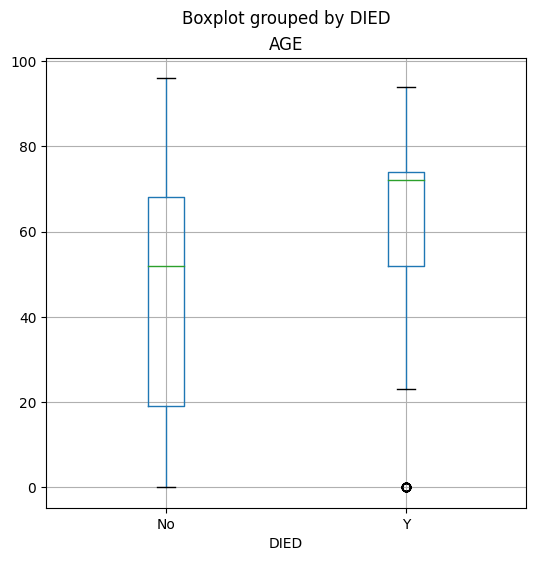

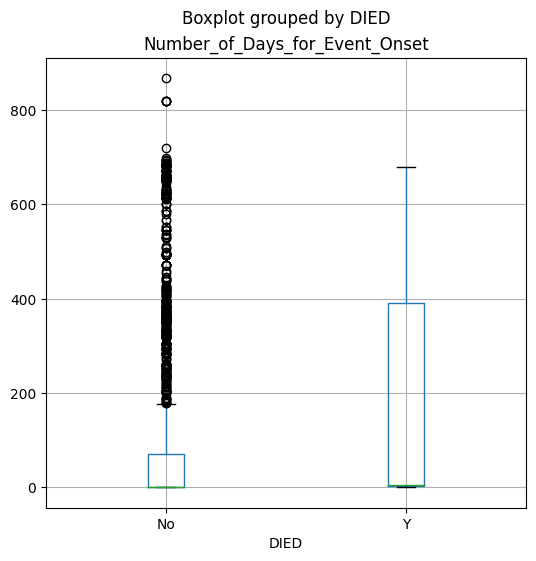

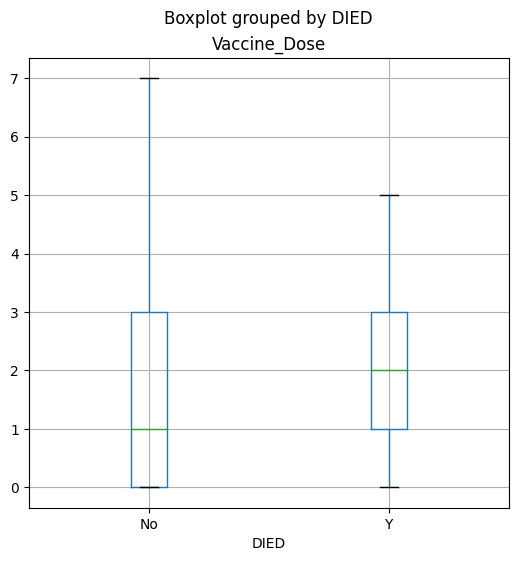

In [20]:
features = ['AGE','Number_of_Days_for_Event_Onset','Vaccine_Dose']

# We cannot include Sex, Vaccine Name columns for box plot as the data is avaiable in string/object format
for col in features:
    Required_Data.boxplot(column=col, by='DIED',figsize=(6,6))
    plt.title(col)
    plt.show()

In [21]:
#Remove the rows in dataframe where 'SEX' has been included as 'Unknown' since we are building model on gender specific details.
#index selects the index of rows which passes the condition.
#inplace=True performs the drop operation in the same dataframe rather than creating a new one.

Required_Data.drop(Required_Data[(Required_Data['SEX'] == "U")].index, inplace=True)
Required_Data

<ipython-input-21-f39a678a2a6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Required_Data.drop(Required_Data[(Required_Data['SEX'] == "U")].index, inplace=True)


,AGE,SEX,DIED,VAX_NAME,VAX_MANU,Vaccine_Dose,Number_of_Days_for_Event_Onset
0,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
1,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
2,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
3,6,M,No,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,3,0
4,38,F,No,COVID19 (COVID19 (MODERNA BIVALENT)),MODERNA,4,0
...,...,...,...,...,...,...,...
3558,0,F,No,COVID19 (COVID19 (MODERNA BIVALENT)),MODERNA,0,0
3560,65,F,No,COVID19 (COVID19 (MODERNA)),MODERNA,2,94
3561,65,F,No,COVID19 (COVID19 (MODERNA)),MODERNA,2,94
3562,65,F,No,COVID19 (COVID19 (MODERNA)),MODERNA,2,94


In [24]:
# Classify 'Sex' column data into 0 and 1 in which 0 = Male, 1 = Female. Modify gender data from string format to integer.

import numpy as np
Required_Data['Is_Female'] = np.where(Required_Data['SEX'] == 'F', 1, 0)
print(Required_Data)

      AGE SEX DIED                              VAX_NAME         VAX_MANU  \
0      53   F   No           COVID19 (COVID19 (JANSSEN))          JANSSEN   
1      53   F   No           COVID19 (COVID19 (JANSSEN))          JANSSEN   
2      53   F   No           COVID19 (COVID19 (JANSSEN))          JANSSEN   
3       6   M   No   COVID19 (COVID19 (PFIZER-BIONTECH))  PFIZER\BIONTECH   
4      38   F   No  COVID19 (COVID19 (MODERNA BIVALENT))          MODERNA   
...   ...  ..  ...                                   ...              ...   
3558    0   F   No  COVID19 (COVID19 (MODERNA BIVALENT))          MODERNA   
3560   65   F   No           COVID19 (COVID19 (MODERNA))          MODERNA   
3561   65   F   No           COVID19 (COVID19 (MODERNA))          MODERNA   
3562   65   F   No           COVID19 (COVID19 (MODERNA))          MODERNA   
3563    0   M   No           COVID19 (COVID19 (MODERNA))          MODERNA   

      Vaccine_Dose  Number_of_Days_for_Event_Onset  Is_Female  
0          

<ipython-input-24-8da51fc5c8fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Required_Data['Is_Female'] = np.where(Required_Data['SEX'] == 'F', 1, 0)


In [25]:
#Remove the duplicate column "IsFemale" in dataframe. It was created as duplicate to 'SEX' while trying to convert data format into integer from string.
#axis should be used if columns should be removed in dataframe.

Required_Data.drop(["IsFemale"], axis=1)

KeyError: ignored

In [ ]:
# Out of 3563 rows 1735 rows have specific genedr details and 'Number of Adverse events onset' is <30.
# It means among 3563 patients, 1753 have been classified as Male/Female and experienced adverse events within 30days of vaccine shot.

In [27]:
#Include newly created column 'Is_Female' under features by replacing 'Sex'.

features = ['AGE','Is_Female', 'VAX_NAME', 'Number_of_Days_for_Event_Onset','Vaccine_Dose']
label = 'DIED'

X, y = Required_Data[features].values,Required_Data[label].values

for n in range(0,5):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [53, 1, 'COVID19 (COVID19 (JANSSEN))', 0, 0] 
  Label: No
Patient 2 
  Features: [53, 1, 'COVID19 (COVID19 (JANSSEN))', 0, 0] 
  Label: No
Patient 3 
  Features: [53, 1, 'COVID19 (COVID19 (JANSSEN))', 0, 0] 
  Label: No
Patient 4 
  Features: [6, 0, 'COVID19 (COVID19 (PFIZER-BIONTECH))', 0, 3] 
  Label: No
Patient 5 
  Features: [38, 1, 'COVID19 (COVID19 (MODERNA BIVALENT))', 0, 4] 
  Label: No


In [28]:
#Split data into 70:30

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=0)
print('Training cases: %d\nTest cases: %d' % (X_train.shape[0],X_test.shape[0]))

Training cases: 2109
Test cases: 904


In [ ]:
 # Calculate how many unique vaccines used for the patients to initiate One-Hot Encoding

In [29]:
print(Required_Data['VAX_NAME'].unique())

['COVID19 (COVID19 (JANSSEN))' 'COVID19 (COVID19 (PFIZER-BIONTECH))'
 'COVID19 (COVID19 (MODERNA BIVALENT))' 'COVID19 (COVID19 (MODERNA))'
 'COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT))'
 'VACCINE NOT SPECIFIED (NO BRAND NAME)' 'SMALLPOX + MONKEYPOX (JYNNEOS)'
 'ZOSTER (NO BRAND NAME)' 'INFLUENZA (SEASONAL) (AFLURIA QUADRIVALENT)'
 'INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE QUADRIVALENT)'
 'INFLUENZA (SEASONAL) (FLUARIX QUADRIVALENT)'
 'INFLUENZA (SEASONAL) (FLUAD QUADRIVALENT)'
 'INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT)'
 'COVID19 (COVID19 (UNKNOWN))' 'INFLUENZA (SEASONAL) (NO BRAND NAME)'
 'INFLUENZA (SEASONAL) (FLULAVAL QUADRIVALENT)'
 'INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT)'
 'VACCINE NOT SPECIFIED (OTHER)' 'HPV (GARDASIL 9)'
 'MENINGOCOCCAL CONJUGATE (MENQUADFI)' 'TDAP (BOOSTRIX)'
 'ZOSTER (SHINGRIX)' 'DTAP + HEPB + IPV (PEDIARIX)' 'HIB (ACTHIB)'
 'PNEUMO (PREVNAR13)' 'ROTAVIRUS (ROTARIX)'
 'MEASLES + MUMPS + RUBELLA (MMR II)' 'VARICELLA (VARIVAX)'
 'DTAP + IPV (KINRIX)' '

In [6]:
# Perform One-Hot Encoding For 'Vaccine Name' to convert text format into integer.
import pandas as pd

one_hot_encoded_data = pd.get_dummies(Required_Data, columns = ['VAX_NAME'])
print(one_hot_encoded_data)

NameError: ignored

In [31]:
#Pull all column names in the dataframe

column_headers = list(one_hot_encoded_data.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['AGE', 'SEX', 'DIED', 'VAX_MANU', 'Vaccine_Dose', 'Number_of_Days_for_Event_Onset', 'Is_Female', 'VAX_NAME_COVID19 (COVID19 (JANSSEN))', 'VAX_NAME_COVID19 (COVID19 (MODERNA BIVALENT))', 'VAX_NAME_COVID19 (COVID19 (MODERNA))', 'VAX_NAME_COVID19 (COVID19 (NOVAVAX))', 'VAX_NAME_COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT))', 'VAX_NAME_COVID19 (COVID19 (PFIZER-BIONTECH))', 'VAX_NAME_COVID19 (COVID19 (UNKNOWN))', 'VAX_NAME_DTAP + HEPB + IPV (PEDIARIX)', 'VAX_NAME_DTAP + IPV (KINRIX)', 'VAX_NAME_HEP A (HAVRIX)', 'VAX_NAME_HIB (ACTHIB)', 'VAX_NAME_HPV (GARDASIL 9)', 'VAX_NAME_INFLUENZA (SEASONAL) (AFLURIA QUADRIVALENT)', 'VAX_NAME_INFLUENZA (SEASONAL) (FLUAD QUADRIVALENT)', 'VAX_NAME_INFLUENZA (SEASONAL) (FLUARIX QUADRIVALENT)', 'VAX_NAME_INFLUENZA (SEASONAL) (FLUBLOK QUADRIVALENT)', 'VAX_NAME_INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT)', 'VAX_NAME_INFLUENZA (SEASONAL) (FLULAVAL QUADRIVALENT)', 'VAX_NAME_INFLUENZA (SEASONAL) (FLUMIST QUADRIVALENT)', 'VAX_NAME_INFLUENZA (

In [34]:
one_hot_encoded_data.columns.values[0:46] =['AGE', 'SEX', 'Death', 'VAX_MANU', 'Vaccine_Dose', 'Number_of_Days_for_Event_Onset', 'IsFemale', 'Is_Female', 'VACCINE_NAME', "Vaccine_1", "Vaccine_2", "Vaccine_3", "Vaccine_4", "Vaccine_5", "Vaccine_6", "Vaccine_7", "Vaccine_8", "Vaccine_9", "Vaccine_10", "Vaccine_11", "Vaccine_12", "Vaccine_13", "Vaccine_14", "Vaccine_15", "Vaccine_16", "Vaccine_17", "Vaccine_18", "Vaccine_19", "Vaccine_20", "Vaccine_21", "Vaccine_22", "Vaccine_23", "Vaccine_24","Vaccine_25", "Vaccine_26", "Vaccine_27", "Vaccine_28", "Vaccine_29", "Vaccine_30", "Vaccine_31", "Vaccine_32", "Vaccine_33", "Vaccine_34", "Vaccine_35", "Vaccine_36", "Vaccine_37"]

# print Data frame after rename columns
display(one_hot_encoded_data)

,AGE,SEX,Death,VAX_MANU,Vaccine_Dose,Number_of_Days_for_Event_Onset,IsFemale,Is_Female,VACCINE_NAME,Vaccine_1,...,Vaccine_28,Vaccine_29,Vaccine_30,Vaccine_31,Vaccine_32,Vaccine_33,Vaccine_34,Vaccine_35,Vaccine_36,Vaccine_37
0,53,F,No,JANSSEN,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,53,F,No,JANSSEN,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,53,F,No,JANSSEN,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,M,No,PFIZER\BIONTECH,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38,F,No,MODERNA,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,0,F,No,MODERNA,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3560,65,F,No,MODERNA,2,94,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3561,65,F,No,MODERNA,2,94,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3562,65,F,No,MODERNA,2,94,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
column_headers = list(one_hot_encoded_data.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['AGE', 'SEX', 'Death', 'VAX_MANU', 'Vaccine_Dose', 'Number_of_Days_for_Event_Onset', 'IsFemale', 'Is_Female', 'VACCINE_NAME', 'Vaccine_1', 'Vaccine_2', 'Vaccine_3', 'Vaccine_4', 'Vaccine_5', 'Vaccine_6', 'Vaccine_7', 'Vaccine_8', 'Vaccine_9', 'Vaccine_10', 'Vaccine_11', 'Vaccine_12', 'Vaccine_13', 'Vaccine_14', 'Vaccine_15', 'Vaccine_16', 'Vaccine_17', 'Vaccine_18', 'Vaccine_19', 'Vaccine_20', 'Vaccine_21', 'Vaccine_22', 'Vaccine_23', 'Vaccine_24', 'Vaccine_25', 'Vaccine_26', 'Vaccine_27', 'Vaccine_28', 'Vaccine_29', 'Vaccine_30', 'Vaccine_31', 'Vaccine_32', 'Vaccine_33', 'Vaccine_34', 'Vaccine_35', 'Vaccine_36', 'Vaccine_37']


In [ ]:
#All Vaccines names used for the patients

'VACCINE_NAME',
'VAX_NAME_COVID19 (COVID19 (JANSSEN))',
'VAX_NAME_COVID19 (COVID19 (MODERNA BIVALENT))',
'VAX_NAME_COVID19 (COVID19 (MODERNA))',
'VAX_NAME_COVID19 (COVID19 (NOVAVAX))',
'VAX_NAME_COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT))',
'VAX_NAME_COVID19 (COVID19 (PFIZER-BIONTECH))',
'VAX_NAME_COVID19 (COVID19 (UNKNOWN))',
'VAX_NAME_DTAP + HEPB + IPV (PEDIARIX)',
'VAX_NAME_DTAP + IPV (KINRIX)',
'VAX_NAME_HEP A (HAVRIX)',
'VAX_NAME_HIB (ACTHIB)',
'VAX_NAME_HPV (GARDASIL 9)',
'VAX_NAME_INFLUENZA (SEASONAL) (AFLURIA QUADRIVALENT)',
'VAX_NAME_INFLUENZA (SEASONAL) (FLUAD QUADRIVALENT)',
'VAX_NAME_INFLUENZA (SEASONAL) (FLUARIX QUADRIVALENT)',
'VAX_NAME_INFLUENZA (SEASONAL) (FLUBLOK QUADRIVALENT)',
'VAX_NAME_INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT)',
'VAX_NAME_INFLUENZA (SEASONAL) (FLULAVAL QUADRIVALENT)',
'VAX_NAME_INFLUENZA (SEASONAL) (FLUMIST QUADRIVALENT)',
'VAX_NAME_INFLUENZA (SEASONAL) (FLUMIST)',
'VAX_NAME_INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE QUADRIVALENT)',
'VAX_NAME_INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT)',
'VAX_NAME_INFLUENZA (SEASONAL) (NO BRAND NAME)',
'VAX_NAME_MEASLES + MUMPS + RUBELLA (MMR II)',
'VAX_NAME_MEASLES + MUMPS + RUBELLA + VARICELLA (PROQUAD)',
'VAX_NAME_MENINGOCOCCAL CONJUGATE (MENQUADFI)',
'VAX_NAME_PNEUMO (PNEUMOVAX)',
'VAX_NAME_PNEUMO (PREVNAR13)',
'VAX_NAME_PNEUMO (PREVNAR20)',
'VAX_NAME_ROTAVIRUS (ROTARIX)',
'VAX_NAME_SMALLPOX + MONKEYPOX (JYNNEOS)',
'VAX_NAME_TDAP (ADACEL)',
'VAX_NAME_TDAP (BOOSTRIX)',
'VAX_NAME_VACCINE NOT SPECIFIED (NO BRAND NAME)',
'VAX_NAME_VACCINE NOT SPECIFIED (OTHER)',
'VAX_NAME_VARICELLA (VARIVAX)',
'VAX_NAME_ZOSTER (NO BRAND NAME)',
'VAX_NAME_ZOSTER (SHINGRIX)'

In [2]:
Final_data = one_hot_encoded_data[['Death','AGE','Is_Female', 'Number_of_Days_for_Event_Onset','Vaccine_Dose','Vaccine_1', 'Vaccine_2', 'Vaccine_3', 'Vaccine_4', 'Vaccine_5', 'Vaccine_6', 'Vaccine_7', 'Vaccine_8', 'Vaccine_9', 'Vaccine_10', 'Vaccine_11', 'Vaccine_12', 'Vaccine_13', 'Vaccine_14', 'Vaccine_15', 'Vaccine_16', 'Vaccine_17', 'Vaccine_18', 'Vaccine_19', 'Vaccine_20', 'Vaccine_21', 'Vaccine_22', 'Vaccine_23', 'Vaccine_24', 'Vaccine_25', 'Vaccine_26', 'Vaccine_27', 'Vaccine_28', 'Vaccine_29', 'Vaccine_30', 'Vaccine_31', 'Vaccine_32', 'Vaccine_33', 'Vaccine_34', 'Vaccine_35', 'Vaccine_36', 'Vaccine_37']]
Final_data.head()

NameError: ignored

In [1]:
features = ['AGE','Is_Female', 'Number_of_Days_for_Event_Onset','Vaccine_Dose','Vaccine_1', 'Vaccine_2', 'Vaccine_3', 'Vaccine_4', 'Vaccine_5', 'Vaccine_6', 'Vaccine_7', 'Vaccine_8', 'Vaccine_9', 'Vaccine_10', 'Vaccine_11', 'Vaccine_12', 'Vaccine_13', 'Vaccine_14', 'Vaccine_15', 'Vaccine_16', 'Vaccine_17', 'Vaccine_18', 'Vaccine_19', 'Vaccine_20', 'Vaccine_21', 'Vaccine_22', 'Vaccine_23', 'Vaccine_24', 'Vaccine_25', 'Vaccine_26', 'Vaccine_27', 'Vaccine_28', 'Vaccine_29', 'Vaccine_30', 'Vaccine_31', 'Vaccine_32', 'Vaccine_33', 'Vaccine_34', 'Vaccine_35', 'Vaccine_36', 'Vaccine_37', 'Vaccine_38']
label = 'Death'

X, y = one_hot_encoded_data[features].values,one_hot_encoded_data[label].values

for n in range(0,5):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

NameError: ignored